## 1. Data preprocessing and EDA:

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn jupyterlab

     ---------------------------------------- 11.3/11.3 MB 8.2 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 KB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 12.4/12.4 MB 8.5 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 KB 10.6 MB/s eta 0:00:00
     ------------------------------------- 347.8/347.8 KB 10.9 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
     ---------------------------------------- 41.3/41.3 MB 8.8 MB/s eta 0:00:00
  Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl (13 kB)
     ---------------------------------------- 76.7/76.7 KB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 59.8/59.8 KB 3.3 MB/s eta 0:00:00
  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
 

You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time as tm

## Initial Data Cleaning and Formating of the DataFrame

In [3]:
# # Loading the two files
# temp_df = pd.read_csv("SoilMoistureProject-temperature.csv")   
# soil_df = pd.read_csv("SoilMoistureProject-soilMoisture.csv")      

# # Converting time columns to datetime 
# temp_df["time"] = pd.to_datetime(temp_df["time"])
# soil_df["time"] = pd.to_datetime(soil_df["time"])

# # Merging on timestamp with full outer join
# merged = pd.merge(temp_df, soil_df, on="time", how="outer")

# # Sorting by time
# merged = merged.sort_values("time")

# # Replacing NaN with NULL
# merged = merged.where(pd.notnull(merged), None)

# # Saving the result as a CSV file
# merged.to_csv("merged_dataset1.csv", index=False)

In [4]:
# df = pd.read_csv('merged_dataset.csv')
# df.dtypes

In [5]:
# # Convert time back to datetime (important)
# df["time"] = pd.to_datetime(df["time"])

# # Set time as index for time-based operations
# df = df.set_index("time")

# # Time Interpolation method

# df_interpolated = df.interpolate(method="time")

# # Moving Average Fill 

# window_size = 5 

# df_filled = df_interpolated.fillna(
#     df_interpolated.rolling(window=window_size, min_periods=1).mean()
# )

# # Reseting the index
# df_filled = df_filled.reset_index()

# # Saving the output in a csv file
# df_filled.to_csv("merged_filled.csv", index=False)

## EDA

In [6]:
df = pd.read_csv("Final_df.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318565 entries, 0 to 318564
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          318565 non-null  object 
 1   temperature   318565 non-null  float64
 2   soilMoisture  318565 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [7]:
df.head()

,time,temperature,soilMoisture
0,2025-11-12 09:08:00.248704936+00:00,23.008131,99
1,2025-11-12 09:08:02.764720638+00:00,23.008141,99
2,2025-11-12 09:08:07.681226269+00:00,23.035870,100
3,2025-11-12 09:08:12.481963698+00:00,23.058266,99
4,2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [8]:
df.isnull().sum()

time            0
temperature     0
soilMoisture    0
dtype: int64

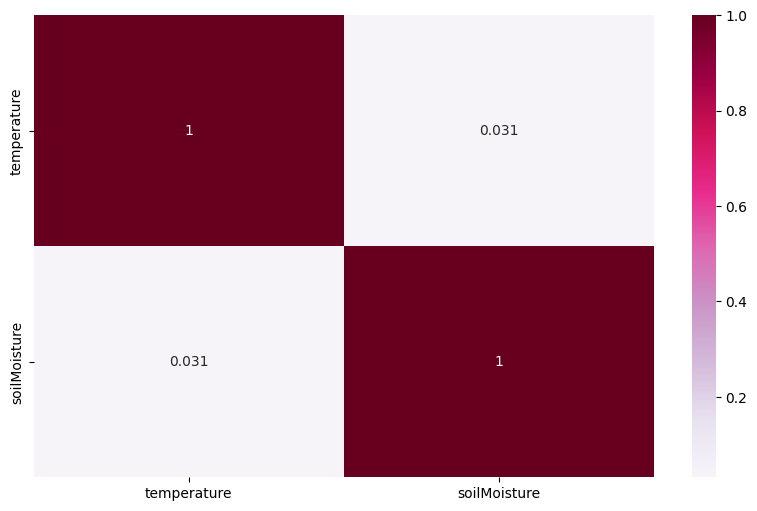

<Figure size 1000x600 with 0 Axes>

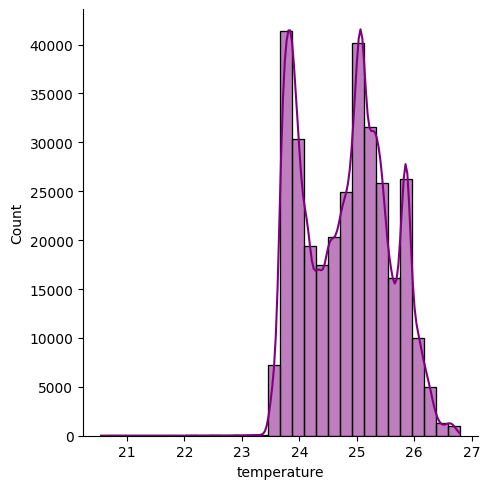

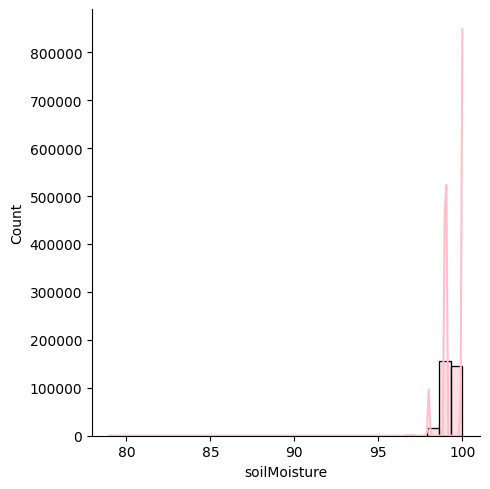

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temperature', 'soilMoisture']].corr(), annot=True, cmap='PuRd')
plt.show()
plt.figure(figsize=(10,6))
sns.displot(df['temperature'], bins=30, kde=True, color='purple')
sns.displot(df['soilMoisture'], bins=30, kde=True, color='pink')
plt.show()



In [10]:
df.set_index('time', inplace=True)
df.head()

,temperature,soilMoisture
time,,
2025-11-12 09:08:00.248704936+00:00,23.008131,99
2025-11-12 09:08:02.764720638+00:00,23.008141,99
2025-11-12 09:08:07.681226269+00:00,23.035870,100
2025-11-12 09:08:12.481963698+00:00,23.058266,99
2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [11]:
df.describe()

,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [12]:
df.index = pd.to_datetime(df.index)


In [13]:
df.index

DatetimeIndex(['2025-11-12 09:08:00.248704936+00:00',
               '2025-11-12 09:08:02.764720638+00:00',
               '2025-11-12 09:08:07.681226269+00:00',
               '2025-11-12 09:08:12.481963698+00:00',
               '2025-11-12 09:08:17.397625407+00:00',
               '2025-11-12 09:08:22.087914111+00:00',
               '2025-11-12 09:08:24.273661543+00:00',
               '2025-11-12 09:08:26.895821718+00:00',
               '2025-11-12 09:08:29.223980499+00:00',
               '2025-11-12 09:08:31.700356068+00:00',
               ...
               '2025-11-25 10:39:06.921174114+00:00',
               '2025-11-25 10:39:11.715189453+00:00',
               '2025-11-25 10:39:16.531205342+00:00',
               '2025-11-25 10:39:21.426286968+00:00',
               '2025-11-25 10:39:23.626132864+00:00',
               '2025-11-25 10:39:26.230529350+00:00',
               '2025-11-25 10:39:30.931017320+00:00',
               '2025-11-25 10:39:35.735291136+00:00',
         

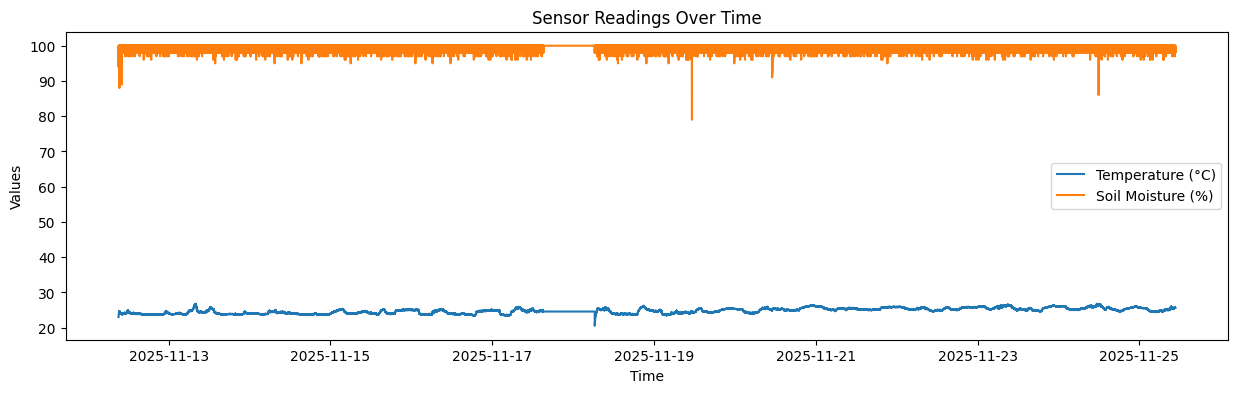

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Sensor Readings Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


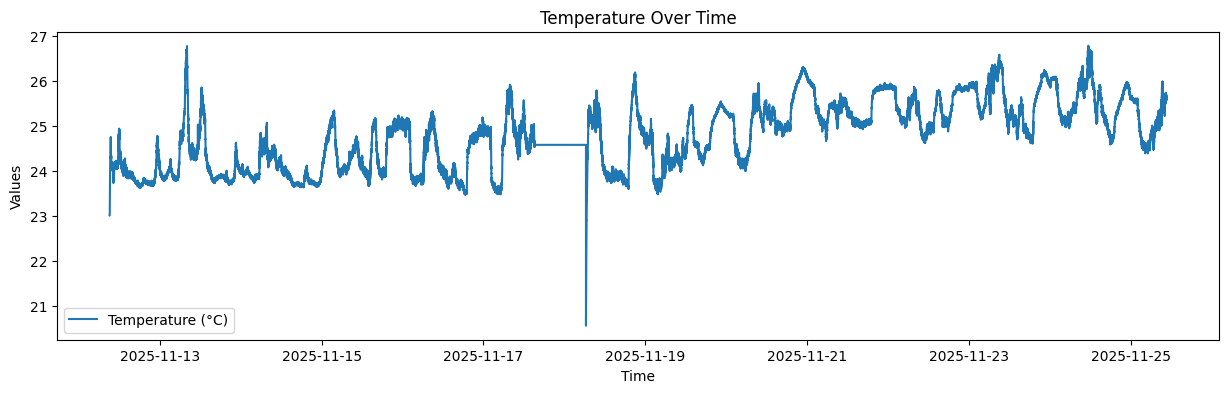

In [15]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.gca().set(title='Temperature Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


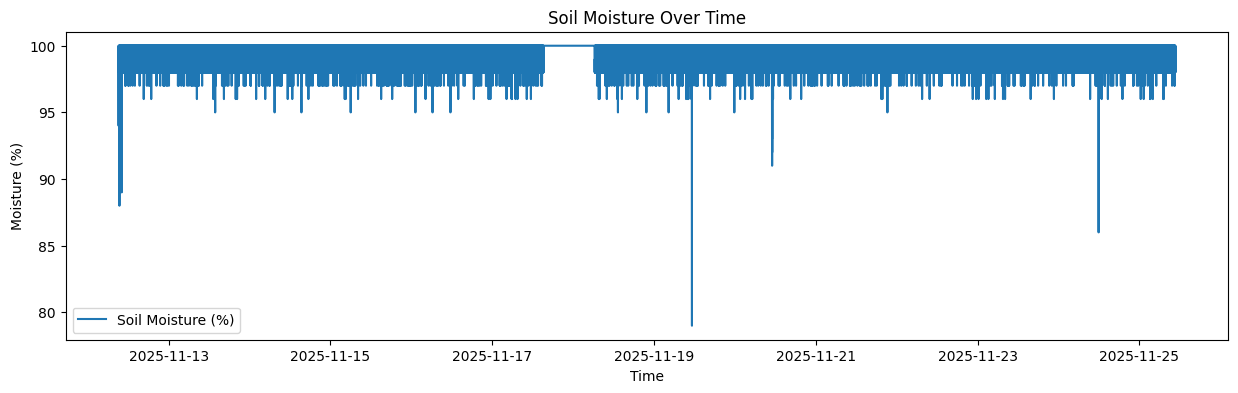

In [16]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Soil Moisture Over Time', xlabel='Time', ylabel='Moisture (%)')
plt.legend()
plt.show()


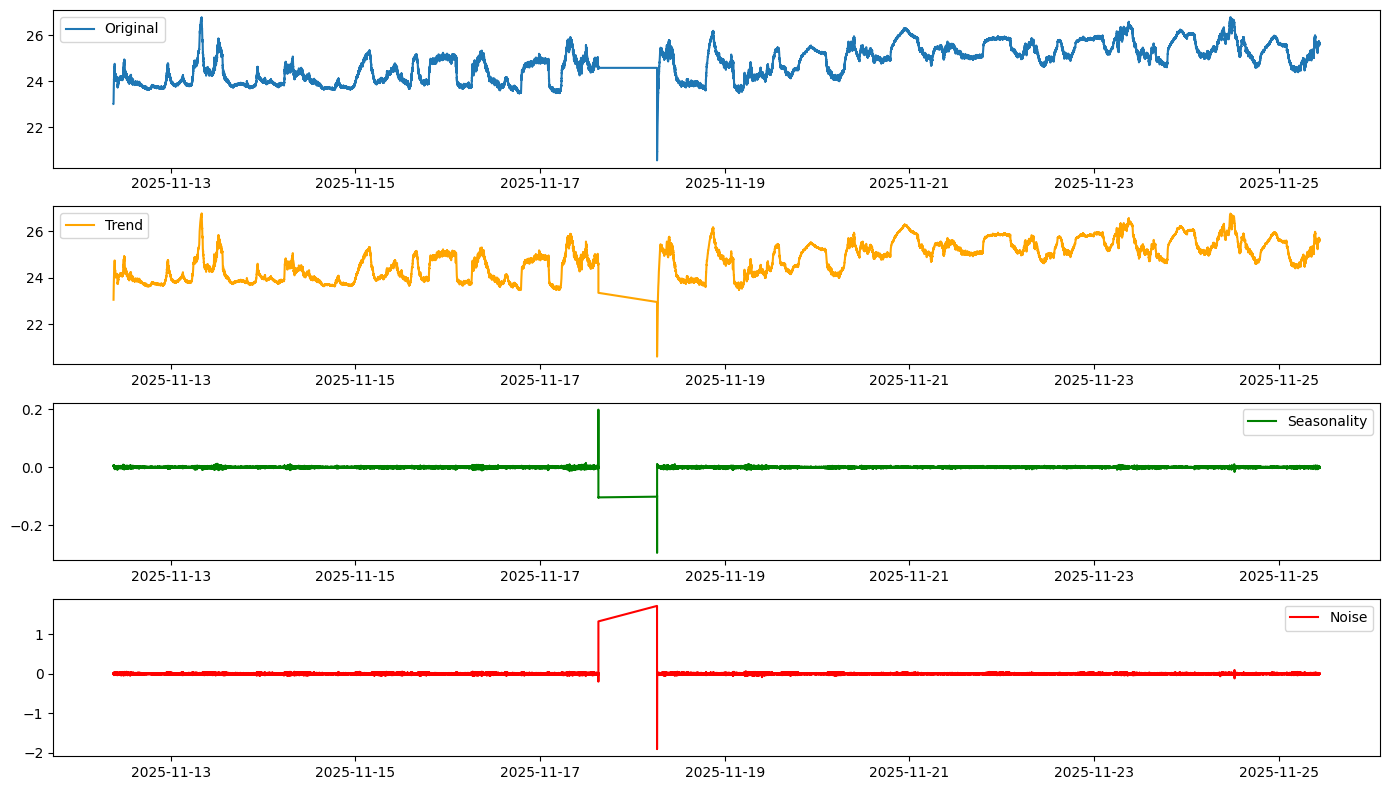

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['temperature']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


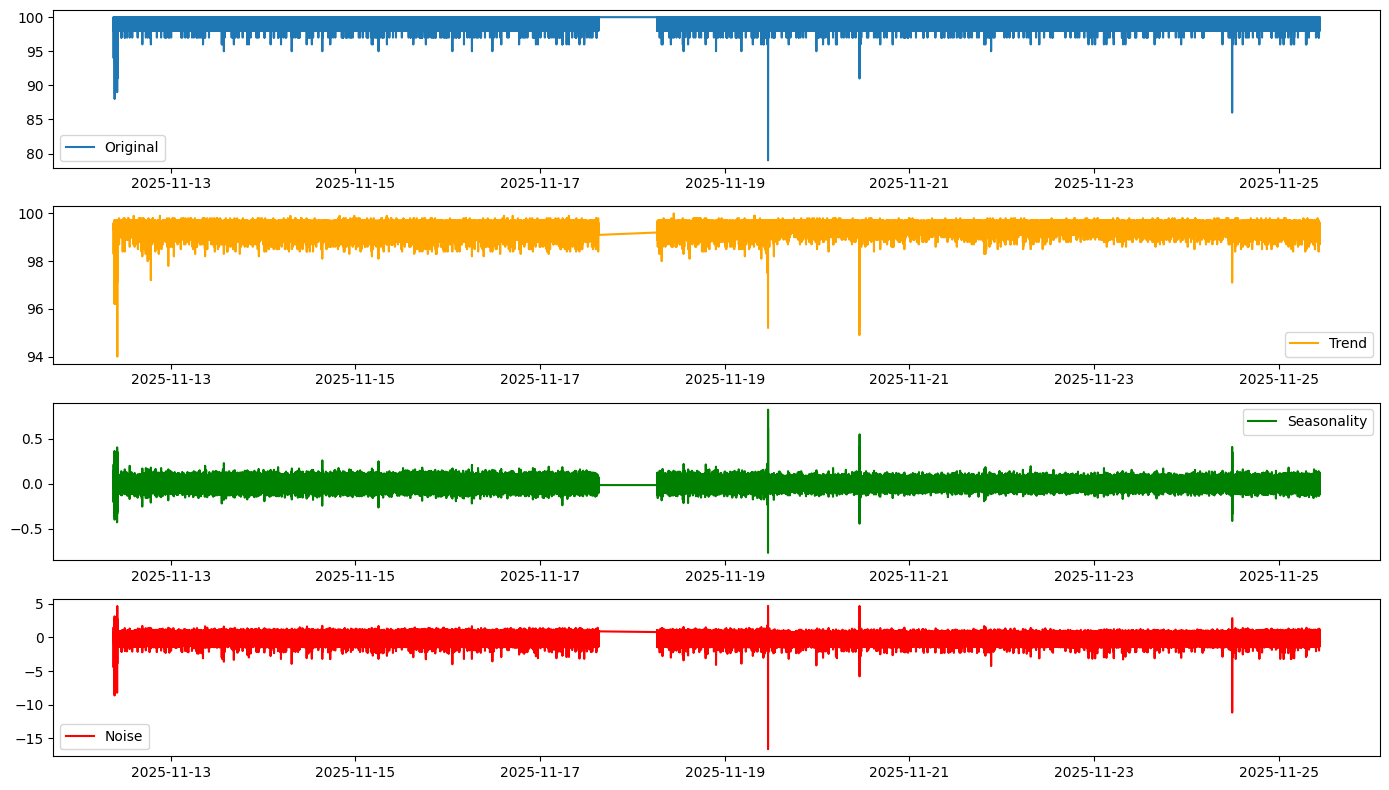

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['soilMoisture']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
%pip install statsmodels 

     ---------------------------------------- 9.6/9.6 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 233.3/233.3 KB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


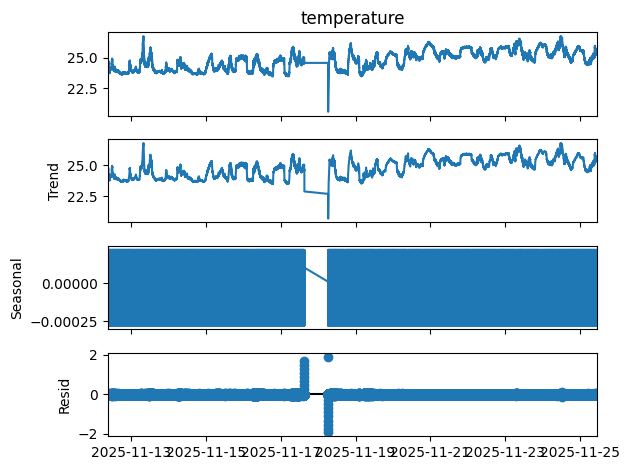

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['temperature'], model='additive', period=20)

result.plot()
plt.show()


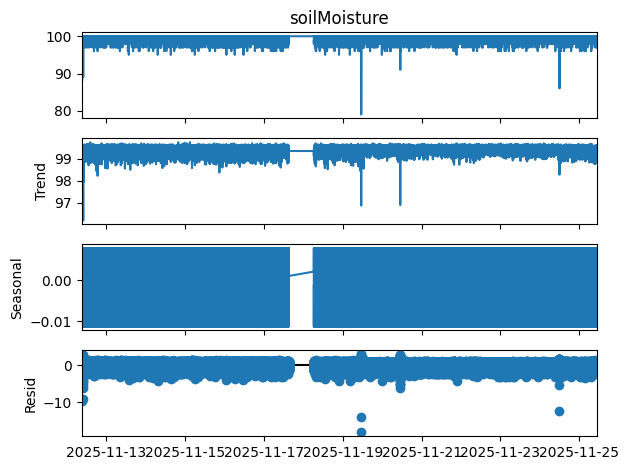

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['soilMoisture'], model='additive', period=20)

result.plot()
plt.show()


In [22]:
%pip install pmdarima 

     -------------------------------------- 719.3/719.3 KB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 11.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Forcasting Models 

### 1. (ARIMA)

In [23]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [24]:
X_train = df[df.index < '2025-11-23 01:45:50']["temperature"]
X_valid  = df[df.index >= '2025-11-23 01:45:50']["temperature"]
y = df['temperature']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (256631,)
X_Valid Shape (61934,)


In [25]:
model = ARIMA(X_train, order=(2,1,2))   # p, d, q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:               256631
Model:                 ARIMA(2, 1, 2)   Log Likelihood              749358.984
Date:                Fri, 28 Nov 2025   AIC                       -1498707.967
Time:                        18:52:14   BIC                       -1498655.690
Sample:                             0   HQIC                      -1498692.746
                             - 256631                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1269      0.015      8.676      0.000       0.098       0.156
ar.L2         -0.2874      0.006    -46.460      0.000      -0.300      -0.275
ma.L1         -0.1932      0.015    -13.204      0.0

In [26]:
n = len(X_valid)
forecast = model_fit.forecast(steps=n)
print(forecast)


256631    25.916141
256632    25.916467
256633    25.916386
256634    25.916282
256635    25.916292
            ...    
318560    25.916316
318561    25.916316
318562    25.916316
318563    25.916316
318564    25.916316
Name: predicted_mean, Length: 61934, dtype: float64


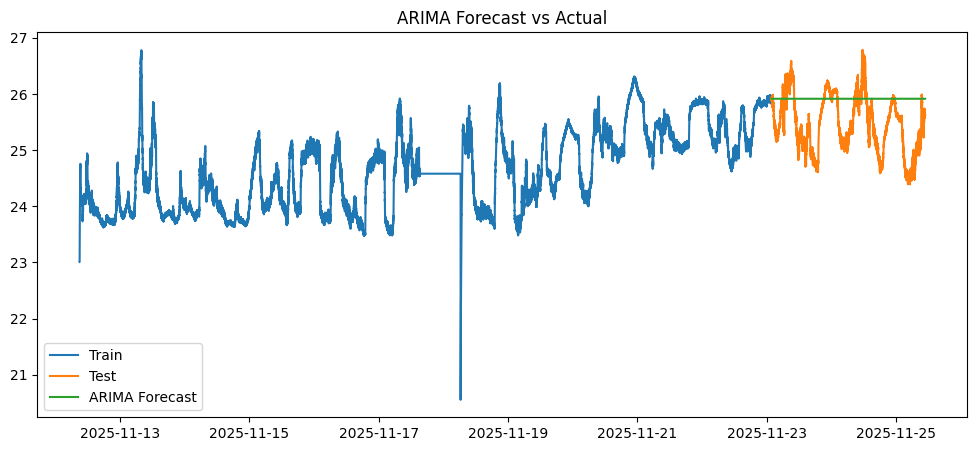

In [27]:
train = X_train
test = X_valid

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


### 2. Linear Regression

In [28]:
# regression model for temperature prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['soilMoisture']]
y = df['temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


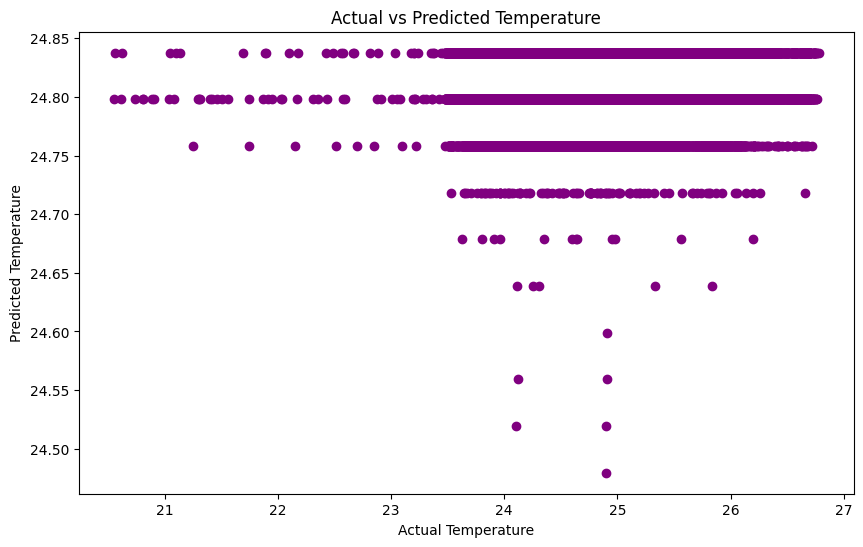

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5718686182985201
R^2 Score: 0.0008454069902951167


In [31]:
# regression model for soil Moisture prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['temperature']]
y = df['soilMoisture']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


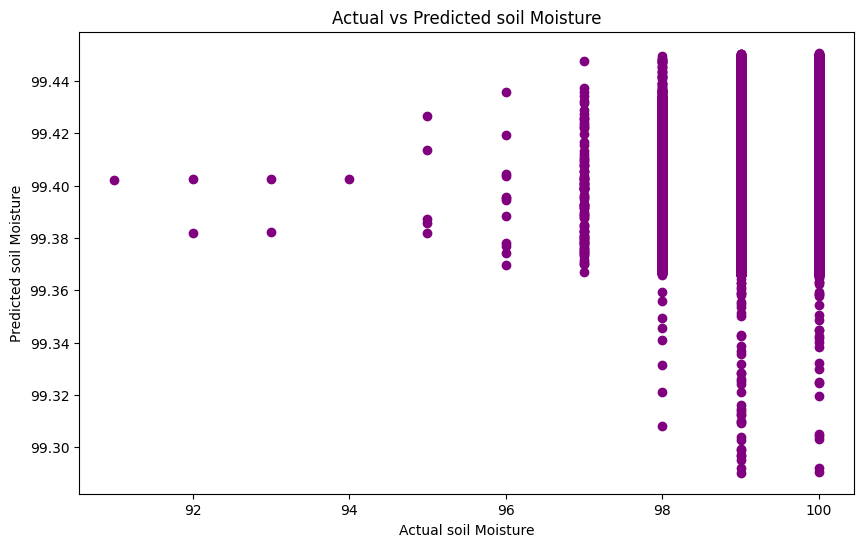

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual soil Moisture")
plt.ylabel("Predicted soil Moisture")
plt.title("Actual vs Predicted soil Moisture")
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.3621336096333593
R^2 Score: 0.0008407014514524302


### 3. LSTM

In [34]:
%pip install tensorflow keras

     -------------------------------------- 331.7/331.7 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.2 MB/s eta 0:00:00
     ------------------------------------- 210.7/210.7 KB 13.4 MB/s eta 0:00:00
     ------------------------------------- 436.9/436.9 KB 28.4 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 46.2 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB ? eta 0:00:00
     ---------------------------------------- 60.4/60.4 KB ? eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 35.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.0 MB/s eta 0:00:00
     -------------------------------------- 135.8/135.8 KB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 50.5 MB/s eta 0:00:00
     --------------------------------------- 26.4/26.4 MB 29.8 MB/s eta 0:00:00
     ---------------------------------------- 302.7/302.7 

You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
# LSTM model for temperature prediction based on soil moisture readings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['soilMoisture', 'temperature']])


X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  # soilMoisture
    y.append(scaled_data[i, 1])       # temperature
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 1)), y_pred), axis=1))[:, 1]
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 1)), y_test.reshape(-1, 1)), axis=1))[:, 1]




Epoch 1/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 319s 40ms/step - loss: 0.0144
Epoch 2/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 319s 40ms/step - loss: 0.0144
Epoch 2/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 315s 40ms/step - loss: 0.0131
Epoch 3/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 315s 40ms/step - loss: 0.0131
Epoch 3/3
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 303s 38ms/step - loss: 0.0131
7963/7963 ━━━━━━━━━━━━━━━━━━━━ 303s 38ms/step - loss: 0.0131
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step


LSTM Model - Mean Squared Error: 0.9109065673774258
LSTM Model - R^2 Score: -2.6147502356602894


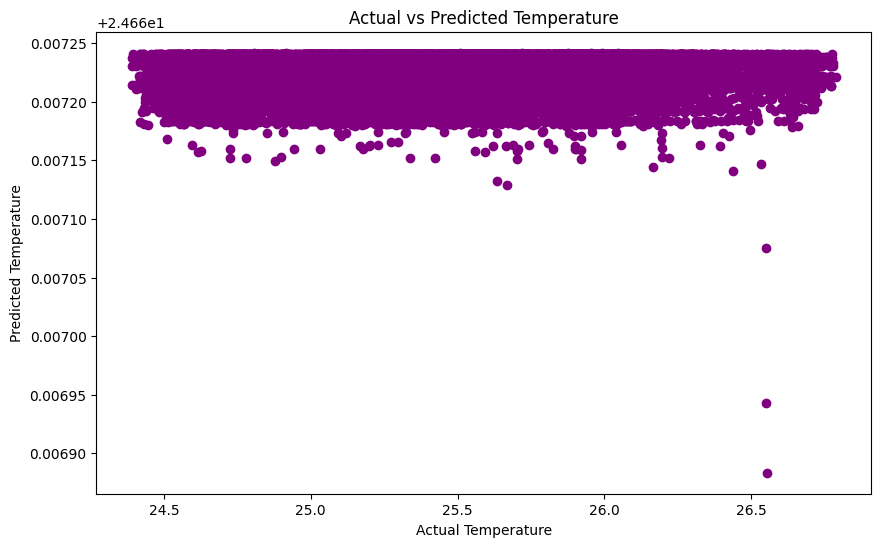

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"LSTM Model - Mean Squared Error: {mse}")
print(f"LSTM Model - R^2 Score: {r2}")
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

### 4. Advanced Time Series Models for Better Predictions

In [37]:
%pip install prophet

     --------------------------------------- 12.1/12.1 MB 24.3 MB/s eta 0:00:00
     ---------------------------------------- 99.1/99.1 KB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 40.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
# 4.1 Prophet Model for Temperature Prediction

from prophet import Prophet

# Preparing data for Prophet model, which requires 'ds' and 'y' columns
prophet_df_temp = df.reset_index()[['time', 'temperature']].rename(columns={'time': 'ds', 'temperature': 'y'})

# Splitting data using first 80% for training, last 20% for testing
split_point = int(0.8 * len(prophet_df_temp))
train_temp = prophet_df_temp[:split_point].copy()
test_temp = prophet_df_temp[split_point:].copy()

# Removing the timezone info from time column since prophet does not support timezone-aware timestamps
train_temp['ds'] = train_temp['ds'].dt.tz_localize(None)
test_temp['ds'] = test_temp['ds'].dt.tz_localize(None)

# Train Prophet model for temperature
model_prophet_temp = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=True, interval_width=0.95)
model_prophet_temp.fit(train_temp)

# Make forecasts for test period
forecast_temp = model_prophet_temp.make_future_dataframe(periods=len(test_temp), freq='S')
forecast_temp = model_prophet_temp.predict(forecast_temp)

# Extract predictions for test period
y_pred_prophet_temp = forecast_temp['yhat'].iloc[-len(test_temp):].values
y_test_prophet_temp = test_temp['y'].values

# Evaluating Prophet Temperature model
mse_prophet_temp = mean_squared_error(y_test_prophet_temp, y_pred_prophet_temp)
r2_prophet_temp = r2_score(y_test_prophet_temp, y_pred_prophet_temp)
rmse_prophet_temp = np.sqrt(mse_prophet_temp)

print("=" * 60)
print("PROPHET MODEL - TEMPERATURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_prophet_temp:.6f}")
print(f"Root Mean Squared Error: {rmse_prophet_temp:.6f}")
print(f"R² Score: {r2_prophet_temp:.4f}")
print("=" * 60)

19:25:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:41 - cmdstanpy - INFO - Chain [1] done processing
19:28:41 - cmdstanpy - INFO - Chain [1] done processing


PROPHET MODEL - TEMPERATURE PREDICTION
Mean Squared Error: 0.224243
Root Mean Squared Error: 0.473543
R² Score: 0.1101


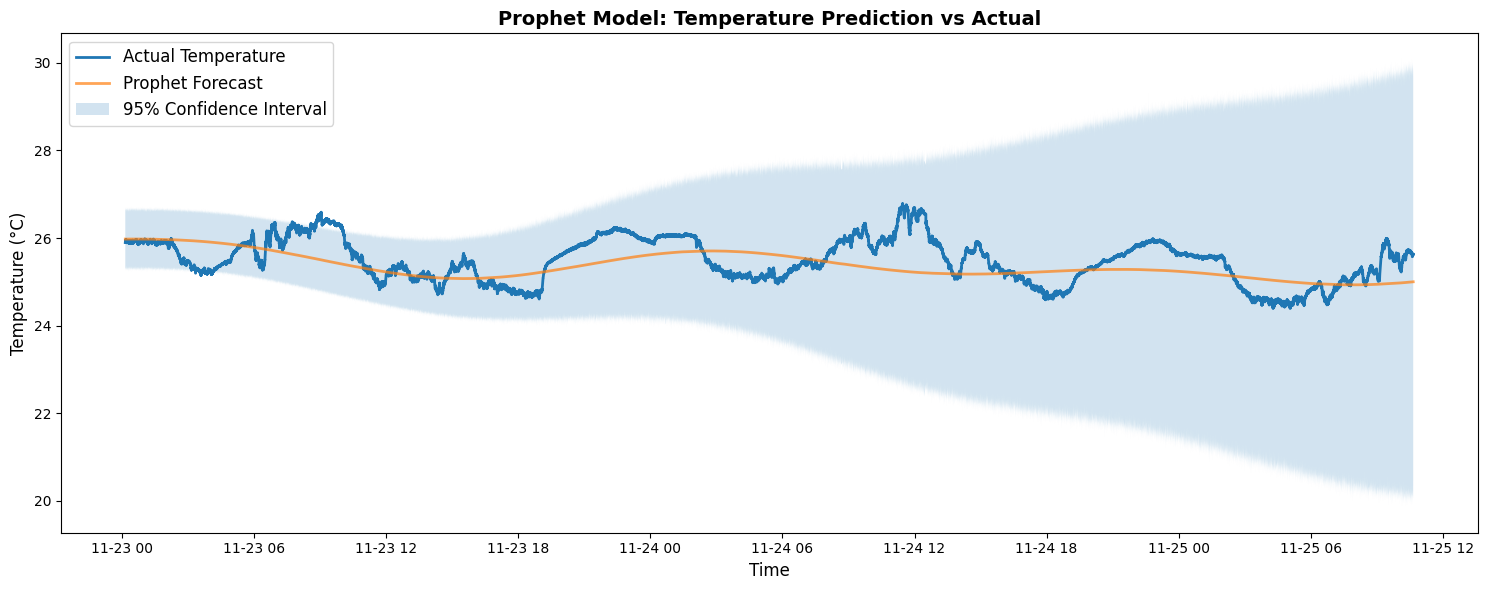

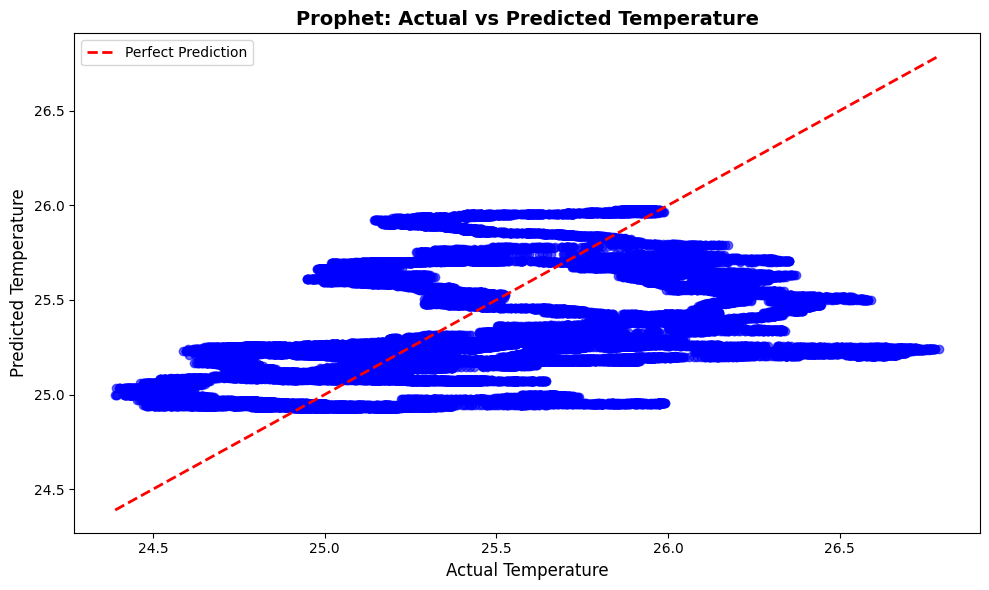

In [ ]:
# Plotting Prophet Temperature Predictions
plt.figure(figsize=(15, 6))
plt.plot(test_temp['ds'], y_test_prophet_temp, label='Actual Temperature', linewidth=2)
plt.plot(test_temp['ds'], y_pred_prophet_temp, label='Prophet Forecast', linewidth=2, alpha=0.7)
plt.fill_between(test_temp['ds'], 
                 forecast_temp['yhat_lower'].iloc[-len(test_temp):], 
                 forecast_temp['yhat_upper'].iloc[-len(test_temp):], 
                 alpha=0.2, label='95% Confidence Interval')
plt.legend(fontsize=12)
plt.title('Prophet Model: Temperature Prediction vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot for Prophet Temperature
plt.figure(figsize=(10, 6))
plt.scatter(y_test_prophet_temp, y_pred_prophet_temp, alpha=0.6, color='blue')
plt.plot([y_test_prophet_temp.min(), y_test_prophet_temp.max()], 
         [y_test_prophet_temp.min(), y_test_prophet_temp.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature', fontsize=12)
plt.ylabel('Predicted Temperature', fontsize=12)
plt.title('Prophet: Actual vs Predicted Temperature', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 4.2 Prophet Model for Soil Moisture Prediction

# Preparing data for Prophet for soil moisture
prophet_df_moisture = df.reset_index()[['time', 'soilMoisture']].rename(columns={'time': 'ds', 'soilMoisture': 'y'})

# Splitting the data
split_point = int(0.8 * len(prophet_df_moisture))
train_moisture = prophet_df_moisture[:split_point].copy()
test_moisture = prophet_df_moisture[split_point:].copy()

# Removing the timezone info from time column since prophet does not support timezone-aware timestamps
train_moisture['ds'] = train_temp['ds'].dt.tz_localize(None)
test_moisture['ds'] = test_temp['ds'].dt.tz_localize(None)

# Training Prophet model for soil moisture
model_prophet_moisture = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=True, interval_width=0.95)
model_prophet_moisture.fit(train_moisture)

# Making predictions for test period
forecast_moisture = model_prophet_moisture.make_future_dataframe(periods=len(test_moisture), freq='S')
forecast_moisture = model_prophet_moisture.predict(forecast_moisture)

# Extracting predictions
y_pred_prophet_moisture = forecast_moisture['yhat'].iloc[-len(test_moisture):].values
y_test_prophet_moisture = test_moisture['y'].values

# Evaluating Prophet Soil Moisture model
mse_prophet_moisture = mean_squared_error(y_test_prophet_moisture, y_pred_prophet_moisture)
r2_prophet_moisture = r2_score(y_test_prophet_moisture, y_pred_prophet_moisture)
rmse_prophet_moisture = np.sqrt(mse_prophet_moisture)

print("=" * 60)
print("PROPHET MODEL - SOIL MOISTURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_prophet_moisture:.6f}")
print(f"Root Mean Squared Error: {rmse_prophet_moisture:.6f}")
print(f"R² Score: {r2_prophet_moisture:.4f}")
print("=" * 60)

19:36:34 - cmdstanpy - INFO - Chain [1] start processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing
19:36:59 - cmdstanpy - INFO - Chain [1] done processing


PROPHET MODEL - SOIL MOISTURE PREDICTION
Mean Squared Error: 0.346785
Root Mean Squared Error: 0.588885
R² Score: -0.0028


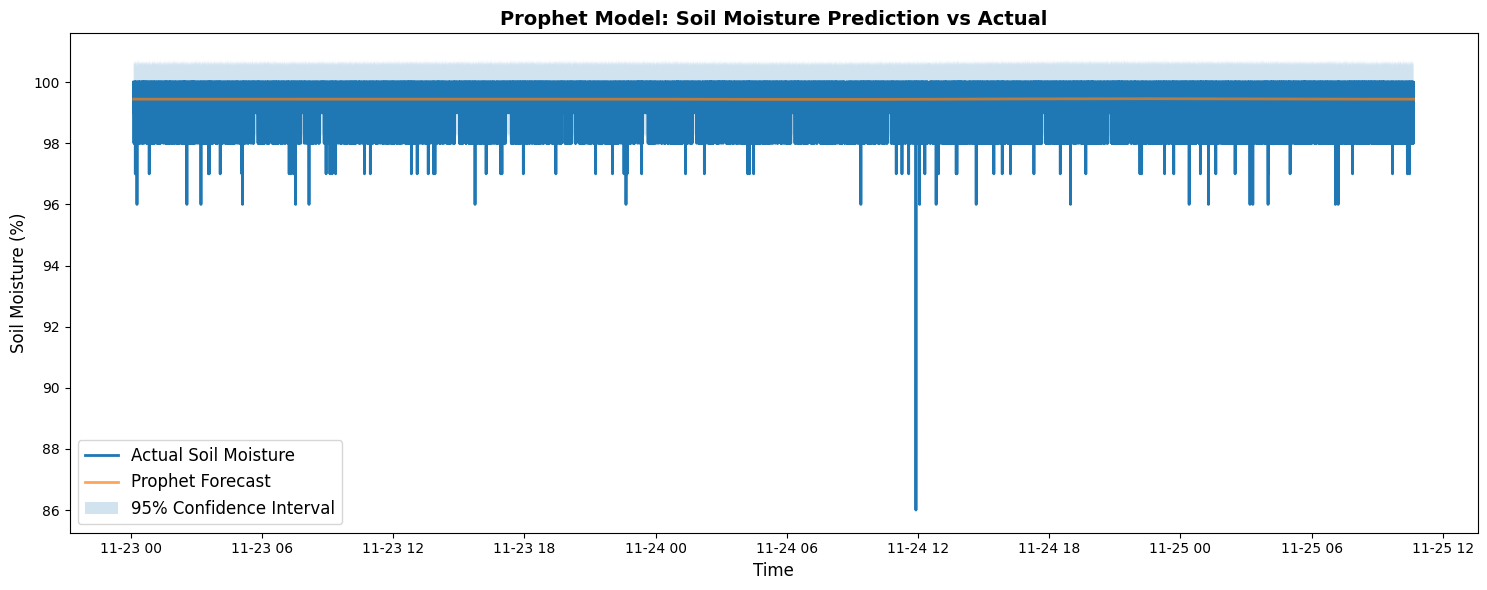

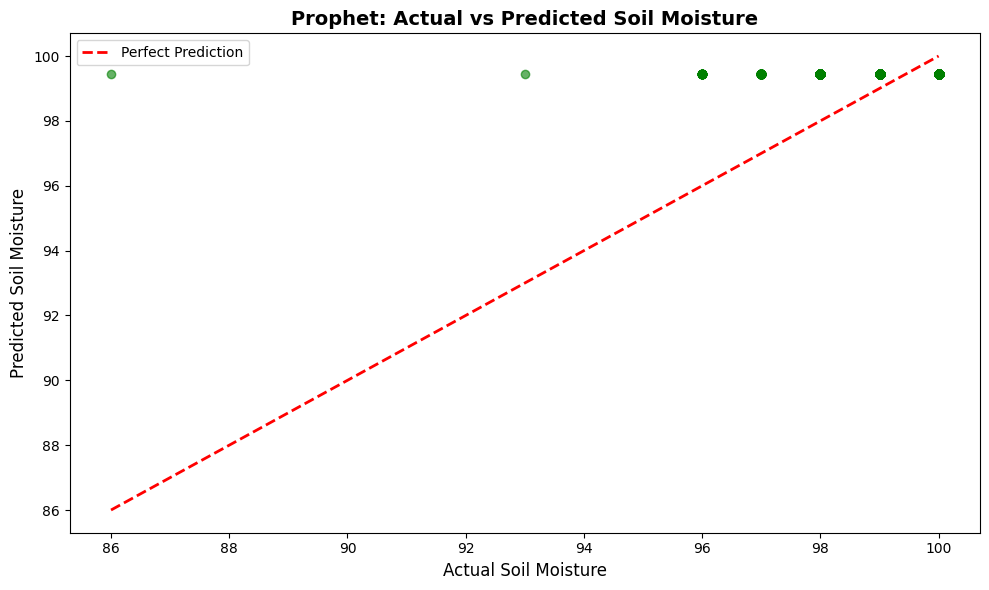

In [ ]:
# Plotting Prophet Soil Moisture Predictions
plt.figure(figsize=(15, 6))
plt.plot(test_moisture['ds'], y_test_prophet_moisture, label='Actual Soil Moisture', linewidth=2)
plt.plot(test_moisture['ds'], y_pred_prophet_moisture, label='Prophet Forecast', linewidth=2, alpha=0.7)
plt.fill_between(test_moisture['ds'], 
                 forecast_moisture['yhat_lower'].iloc[-len(test_moisture):], 
                 forecast_moisture['yhat_upper'].iloc[-len(test_moisture):], 
                 alpha=0.2, label='95% Confidence Interval')
plt.legend(fontsize=12)
plt.title('Prophet Model: Soil Moisture Prediction vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Soil Moisture (%)', fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot for Prophet Soil Moisture
plt.figure(figsize=(10, 6))
plt.scatter(y_test_prophet_moisture, y_pred_prophet_moisture, alpha=0.6, color='green')
plt.plot([y_test_prophet_moisture.min(), y_test_prophet_moisture.max()], 
         [y_test_prophet_moisture.min(), y_test_prophet_moisture.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Soil Moisture', fontsize=12)
plt.ylabel('Predicted Soil Moisture', fontsize=12)
plt.title('Prophet: Actual vs Predicted Soil Moisture', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### 4.3 Vector AutoRegression (VAR) - Multivariate Time Series Model

In [69]:
from statsmodels.tsa.api import VAR

# Preparing data for VAR model
df_hourly = df.resample('1H').mean()
var_data = df_hourly[['temperature', 'soilMoisture']].dropna()

# Split data
split_idx_var = int(0.8 * len(var_data))
train_var = var_data[:split_idx_var]
test_var = var_data[split_idx_var:]

# Fit VAR model
var_model = VAR(train_var)
# Select lag order using AIC
lag_order = var_model.select_order().aic
print(f"Optimal lag order selected by AIC: {lag_order}")

# Fit with optimal lag
var_fit = var_model.fit(lag_order)
print(var_fit.summary())

# Forecast
var_forecast = var_fit.forecast(train_var.values[-lag_order:], steps=len(test_var))
y_pred_var_temp = var_forecast[:, 0]
y_pred_var_moisture = var_forecast[:, 1]

# Extract actual test values
y_test_var_temp = test_var['temperature'].values
y_test_var_moisture = test_var['soilMoisture'].values

# Evaluate VAR Model for Temperature
mse_var_temp = mean_squared_error(y_test_var_temp, y_pred_var_temp)
r2_var_temp = r2_score(y_test_var_temp, y_pred_var_temp)
rmse_var_temp = np.sqrt(mse_var_temp)

print("=" * 60)
print("VAR MODEL - TEMPERATURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_var_temp:.6f}")
print(f"Root Mean Squared Error: {rmse_var_temp:.6f}")
print(f"R² Score: {r2_var_temp:.4f}")
print("=" * 60)

# Evaluate VAR Model for Soil Moisture
mse_var_moisture = mean_squared_error(y_test_var_moisture, y_pred_var_moisture)
r2_var_moisture = r2_score(y_test_var_moisture, y_pred_var_moisture)
rmse_var_moisture = np.sqrt(mse_var_moisture)

print("=" * 60)
print("VAR MODEL - SOIL MOISTURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_var_moisture:.6f}")
print(f"Root Mean Squared Error: {rmse_var_moisture:.6f}")
print(f"R² Score: {r2_var_moisture:.4f}")
print("=" * 60)

Optimal lag order selected by AIC: 6
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 28, Nov, 2025
Time:                     22:10:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.94034
Nobs:                     234.000    HQIC:                  -9.16946
Log likelihood:           452.875    FPE:                8.92534e-05
AIC:                     -9.32426    Det(Omega_mle):     8.01055e-05
--------------------------------------------------------------------
Results for equation temperature
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                -293.349790        86.049574           -3.409           0.001
L1.temperature          1.050442         0.066668           15.756           0.000
L1.soilMo

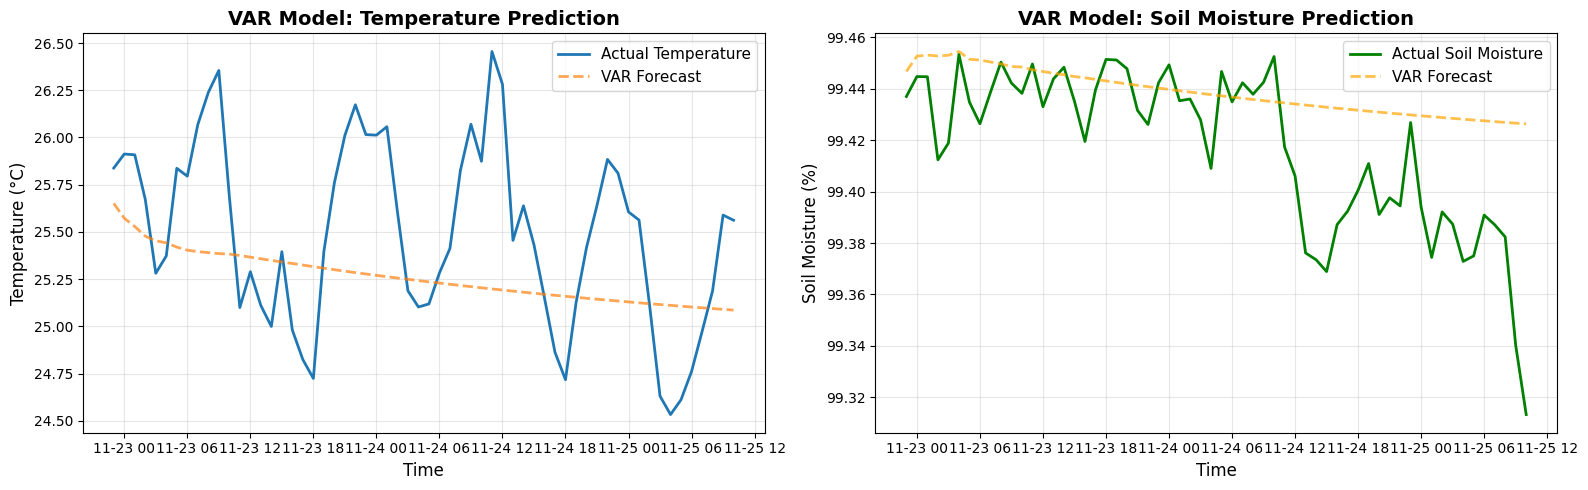

In [ ]:
# Plotting the VAR Model Predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Temperature plot
axes[0].plot(test_var.index, y_test_var_temp, label='Actual Temperature', linewidth=2)
axes[0].plot(test_var.index, y_pred_var_temp, label='VAR Forecast', linewidth=2, alpha=0.7, linestyle='--')
axes[0].set_title('VAR Model: Temperature Prediction', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Soil Moisture plot
axes[1].plot(test_var.index, y_test_var_moisture, label='Actual Soil Moisture', linewidth=2, color='green')
axes[1].plot(test_var.index, y_pred_var_moisture, label='VAR Forecast', linewidth=2, alpha=0.7, linestyle='--', color='orange')
axes[1].set_title('VAR Model: Soil Moisture Prediction', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Soil Moisture (%)', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 4.5 Gradient Boosting (XGBoost) with Lag Features - For Non-Linear Patterns

In [71]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Function to create lag features
def create_lag_features(data, lag_steps=24):
    """
    Creates lag features for time series data
    """
    df_lag = pd.DataFrame(data)
    for i in range(1, lag_steps + 1):
        df_lag[f'lag_{i}'] = df_lag.iloc[:, 0].shift(i)
    df_lag['hour'] = df_lag.index.hour if hasattr(df_lag.index, 'hour') else 0
    df_lag['day'] = df_lag.index.day if hasattr(df_lag.index, 'day') else 0
    return df_lag.dropna()

# Preparing data with lag features for temperature
df_hourly_reset = df_hourly.reset_index()
df_hourly_reset['time'] = pd.to_datetime(df_hourly_reset['time'])
df_hourly_reset = df_hourly_reset.set_index('time')

# Creating lag features for temperature (using 48 hours of data)
df_temp_lag = create_lag_features(df_hourly_reset[['temperature']], lag_steps=48)
df_temp_lag['hour'] = df_temp_lag.index.hour
df_temp_lag['day'] = df_temp_lag.index.day

# Splitting for XGBoost temperature
split_xgb = int(0.8 * len(df_temp_lag))
X_train_xgb_temp = df_temp_lag.iloc[:split_xgb, 1:]  # Skip first column (target)
y_train_xgb_temp = df_temp_lag.iloc[:split_xgb, 0]
X_test_xgb_temp = df_temp_lag.iloc[split_xgb:, 1:]
y_test_xgb_temp = df_temp_lag.iloc[split_xgb:, 0]

# Scaling features
scaler_xgb_temp = StandardScaler()
X_train_xgb_temp_scaled = scaler_xgb_temp.fit_transform(X_train_xgb_temp)
X_test_xgb_temp_scaled = scaler_xgb_temp.transform(X_test_xgb_temp)

# Training XGBoost for temperature
xgb_model_temp = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model_temp.fit(X_train_xgb_temp_scaled, y_train_xgb_temp, verbose=False)

# Predicting temp
y_pred_xgb_temp = xgb_model_temp.predict(X_test_xgb_temp_scaled)

# Evaluating XGBoost Temperature
mse_xgb_temp = mean_squared_error(y_test_xgb_temp, y_pred_xgb_temp)
r2_xgb_temp = r2_score(y_test_xgb_temp, y_pred_xgb_temp)
rmse_xgb_temp = np.sqrt(mse_xgb_temp)

print("=" * 60)
print("XGBOOST MODEL - TEMPERATURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_xgb_temp:.6f}")
print(f"Root Mean Squared Error: {rmse_xgb_temp:.6f}")
print(f"R² Score: {r2_xgb_temp:.4f}")
print("=" * 60)

XGBOOST MODEL - TEMPERATURE PREDICTION
Mean Squared Error: 0.087435
Root Mean Squared Error: 0.295694
R² Score: 0.6367


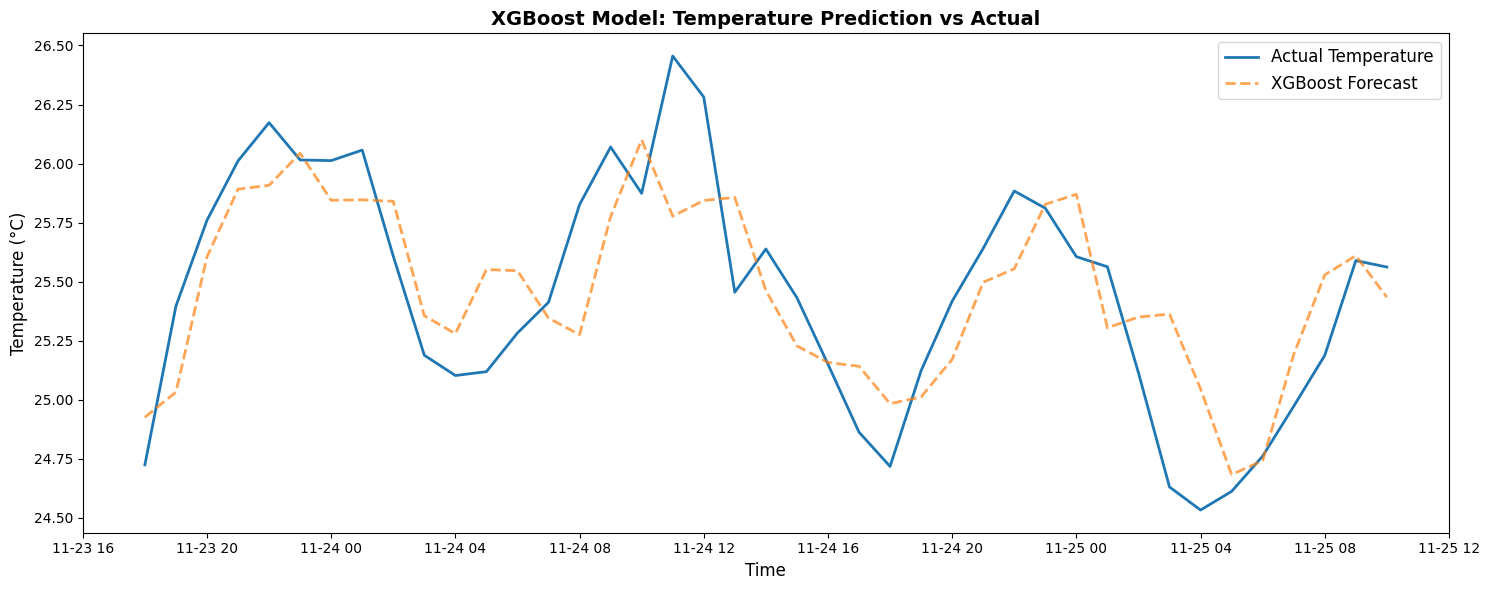

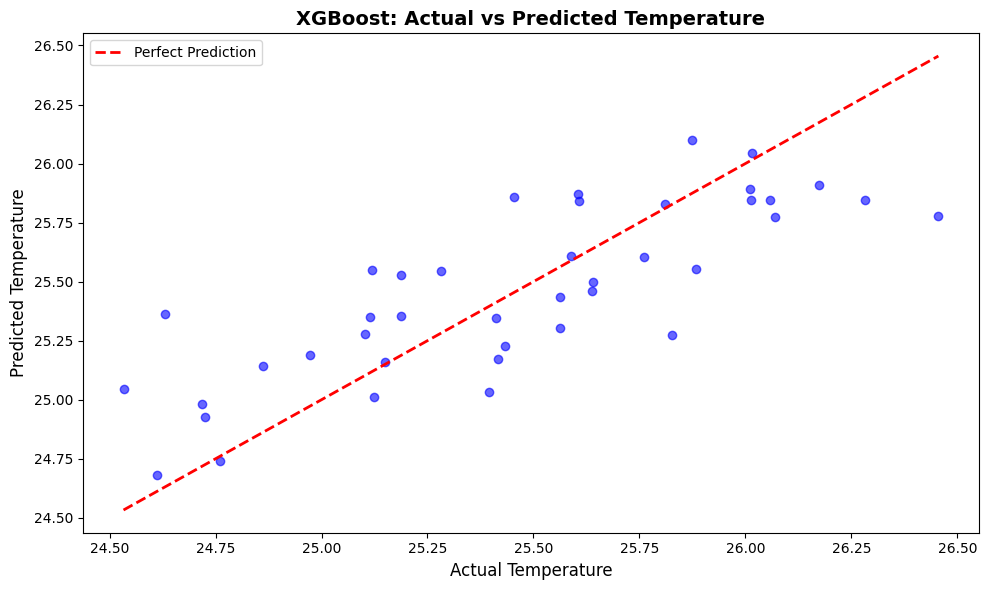

In [ ]:
# Plotting XGBoost Temperature Predictions
plt.figure(figsize=(15, 6))
plt.plot(df_temp_lag.index[split_xgb:], y_test_xgb_temp.values, label='Actual Temperature', linewidth=2)
plt.plot(df_temp_lag.index[split_xgb:], y_pred_xgb_temp, label='XGBoost Forecast', linewidth=2, alpha=0.7, linestyle='--')
plt.legend(fontsize=12)
plt.title('XGBoost Model: Temperature Prediction vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_xgb_temp, y_pred_xgb_temp, alpha=0.6, color='blue')
plt.plot([y_test_xgb_temp.min(), y_test_xgb_temp.max()], 
         [y_test_xgb_temp.min(), y_test_xgb_temp.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Temperature', fontsize=12)
plt.ylabel('Predicted Temperature', fontsize=12)
plt.title('XGBoost: Actual vs Predicted Temperature', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# XGBoost for Soil Moisture
df_moisture_lag = create_lag_features(df_hourly_reset[['soilMoisture']], lag_steps=48)
df_moisture_lag['hour'] = df_moisture_lag.index.hour
df_moisture_lag['day'] = df_moisture_lag.index.day

# Splitting train and test dta for XGBoost soil moisture
split_xgb_m = int(0.8 * len(df_moisture_lag))
X_train_xgb_moisture = df_moisture_lag.iloc[:split_xgb_m, 1:]
y_train_xgb_moisture = df_moisture_lag.iloc[:split_xgb_m, 0]
X_test_xgb_moisture = df_moisture_lag.iloc[split_xgb_m:, 1:]
y_test_xgb_moisture = df_moisture_lag.iloc[split_xgb_m:, 0]

# Scaling features
scaler_xgb_moisture = StandardScaler()
X_train_xgb_moisture_scaled = scaler_xgb_moisture.fit_transform(X_train_xgb_moisture)
X_test_xgb_moisture_scaled = scaler_xgb_moisture.transform(X_test_xgb_moisture)

# Training XGBoost for soil moisture
xgb_model_moisture = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model_moisture.fit(X_train_xgb_moisture_scaled, y_train_xgb_moisture, verbose=False)

# XGB Predictions
y_pred_xgb_moisture = xgb_model_moisture.predict(X_test_xgb_moisture_scaled)

# Evaluate XGBoost Soil Moisture
mse_xgb_moisture = mean_squared_error(y_test_xgb_moisture, y_pred_xgb_moisture)
r2_xgb_moisture = r2_score(y_test_xgb_moisture, y_pred_xgb_moisture)
rmse_xgb_moisture = np.sqrt(mse_xgb_moisture)

print("=" * 60)
print("XGBOOST MODEL - SOIL MOISTURE PREDICTION")
print("=" * 60)
print(f"Mean Squared Error: {mse_xgb_moisture:.6f}")
print(f"Root Mean Squared Error: {rmse_xgb_moisture:.6f}")
print(f"R² Score: {r2_xgb_moisture:.4f}")
print("=" * 60)

XGBOOST MODEL - SOIL MOISTURE PREDICTION
Mean Squared Error: 0.001973
Root Mean Squared Error: 0.044422
R² Score: -0.8701


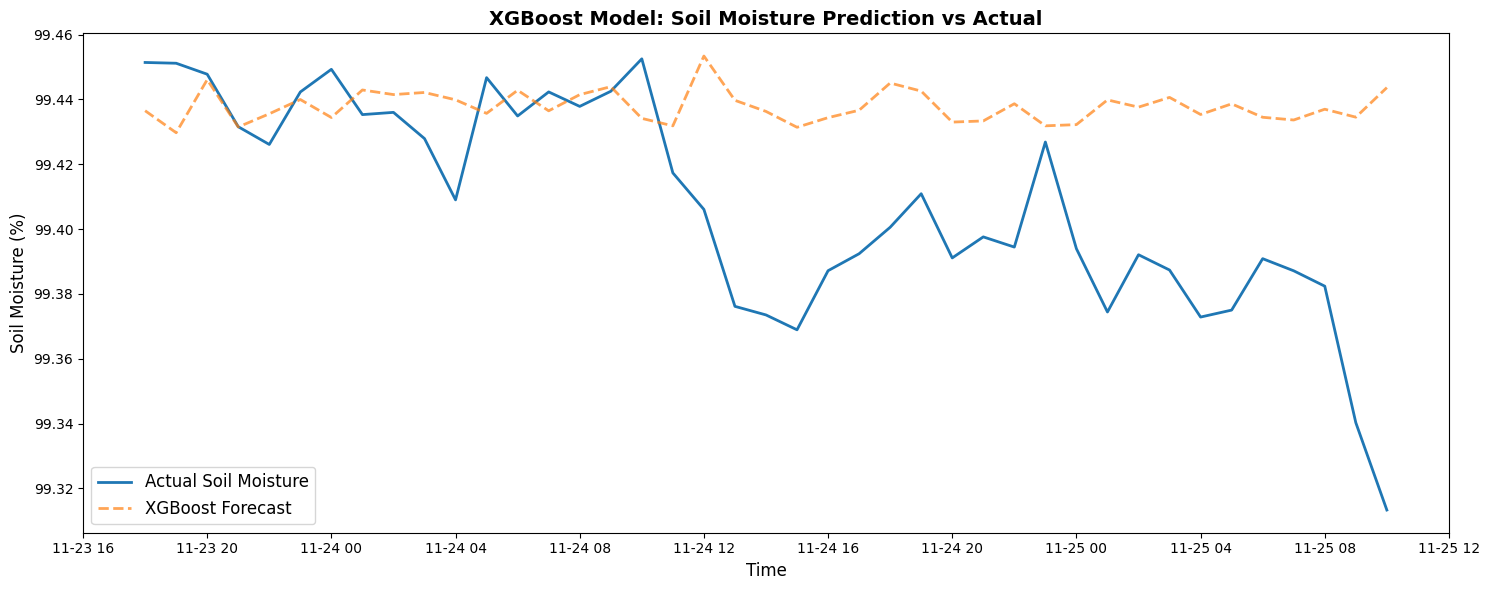

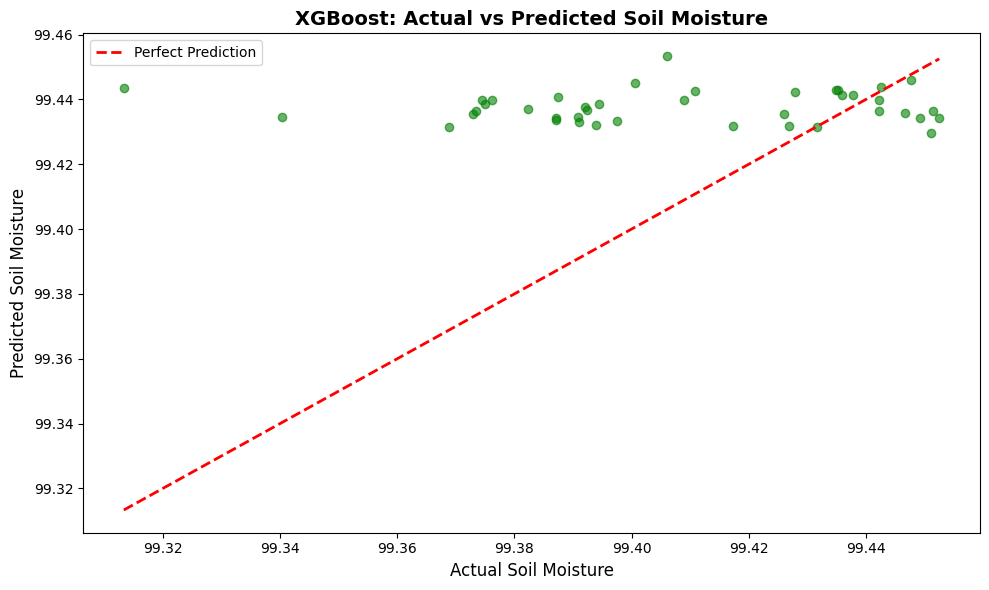

In [ ]:
# Plotting XGBoost Soil Moisture Predictions
plt.figure(figsize=(15, 6))
plt.plot(df_moisture_lag.index[split_xgb_m:], y_test_xgb_moisture.values, label='Actual Soil Moisture', linewidth=2)
plt.plot(df_moisture_lag.index[split_xgb_m:], y_pred_xgb_moisture, label='XGBoost Forecast', linewidth=2, alpha=0.7, linestyle='--')
plt.legend(fontsize=12)
plt.title('XGBoost Model: Soil Moisture Prediction vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Soil Moisture (%)', fontsize=12)
plt.tight_layout()
plt.show()

# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_xgb_moisture, y_pred_xgb_moisture, alpha=0.6, color='green')
plt.plot([y_test_xgb_moisture.min(), y_test_xgb_moisture.max()], 
         [y_test_xgb_moisture.min(), y_test_xgb_moisture.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Soil Moisture', fontsize=12)
plt.ylabel('Predicted Soil Moisture', fontsize=12)
plt.title('XGBoost: Actual vs Predicted Soil Moisture', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### 4.6 Model Comparison Summary


COMPREHENSIVE MODEL COMPARISON
                  Model     RMSE  R² Score
      Linear Regression 0.954414 -2.614750
  Prophet (Temperature) 0.473543  0.110095
Prophet (Soil Moisture) 0.588885 -0.002805
      VAR (Temperature) 0.508144 -0.133244
    VAR (Soil Moisture) 0.033285 -0.166287
  XGBoost (Temperature) 0.295694  0.636713
XGBoost (Soil Moisture) 0.044422 -0.870071


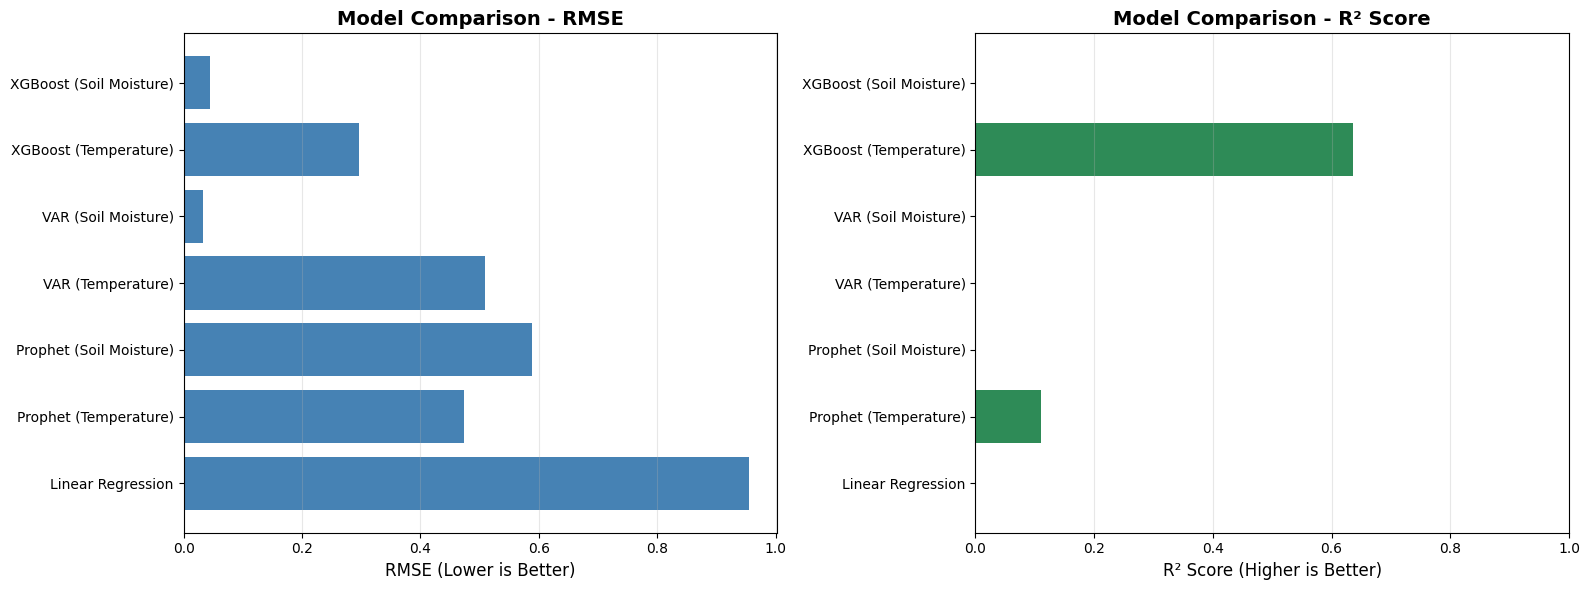

In [76]:
# Comprehensive Model Comparison
comparison_data = {
    'Model': [
        'Linear Regression',
        'Prophet (Temperature)',
        'Prophet (Soil Moisture)',
        'VAR (Temperature)',
        'VAR (Soil Moisture)',
        'XGBoost (Temperature)',
        'XGBoost (Soil Moisture)'
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred)),  
        rmse_prophet_temp,
        rmse_prophet_moisture,
        rmse_var_temp,
        rmse_var_moisture,
        rmse_xgb_temp,
        rmse_xgb_moisture
    ],
    'R² Score': [
        r2_score(y_test, y_pred),
        r2_prophet_temp,
        r2_prophet_moisture,
        r2_var_temp,
        r2_var_moisture,
        r2_xgb_temp,
        r2_xgb_moisture
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("=" * 80)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE Comparison
axes[0].barh(comparison_df['Model'], comparison_df['RMSE'], color='steelblue')
axes[0].set_xlabel('RMSE (Lower is Better)', fontsize=12)
axes[0].set_title('Model Comparison - RMSE', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# R² Score Comparison
axes[1].barh(comparison_df['Model'], comparison_df['R² Score'], color='seagreen')
axes[1].set_xlabel('R² Score (Higher is Better)', fontsize=12)
axes[1].set_title('Model Comparison - R² Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].set_xlim([0, 1])

plt.tight_layout()
plt.show()